In [1]:
%cd /home/aditya/Documents/SOMBL/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import scripts.plot_utils as putils
import scripts.plot_densities as pdens
import scripts.calc_grgrstar_funcs  as grfuncs

sns.set()

/home/aditya/Documents/SOMBL


In [2]:
%config InlineBackend.figure_format = 'svg'

In [50]:
energy_core_min = -8
energy_core_max = 8

In [15]:
def get_data(length, pattern):
    df = pd.read_csv(f"data/spin_imbalances_bins_L{length}_{pattern}.dat")
    
    complex_types = {
        'spin_up_imb_S_plus': complex,
        'spin_up_imb_S_minus': complex,
        'spin_up_imb_S_x': complex,
        'spin_up_imb_S_y': complex,
        'spin_up_imb_S_z': complex,
        # 'staggered_mag_z': complex,
    }
    df = df.astype(complex_types)
    return df

In [16]:
length = 60
# pattern = "altn_altupdown_updown"
# pattern = "altn_altupdown_empty"
# pattern = "altn_random_updown"
# pattern = "altn_randomequalmean_updown"
pattern = "alt_up_down"

In [18]:
df = get_data(length, pattern)

In [60]:
def bin_to_energy(binnum, totalbins, energy_core_min, energy_core_max):
    # within_range = np.logical_and((binnum >= 1), (binnum <= (totalbins-1)))
    energies = np.zeros(len(binnum))
    dE = (energy_core_max - energy_core_min) / totalbins
    energies = (binnum - 1) * dE + energy_core_min
    energies[binnum == 0] = energy_core_min*1.1
    energies[binnum == totalbins - 1] = energy_core_max*1.1
    return energies

In [61]:
energies = bin_to_energy(df["binnum"], 50, energy_core_min, energy_core_max)
df["energy"] = energies

In [62]:
loc_df = df.loc[df["disorder"].isin([13, 14, 15])]
deloc_df = df.loc[df["disorder"].isin([10, 11, 12])]

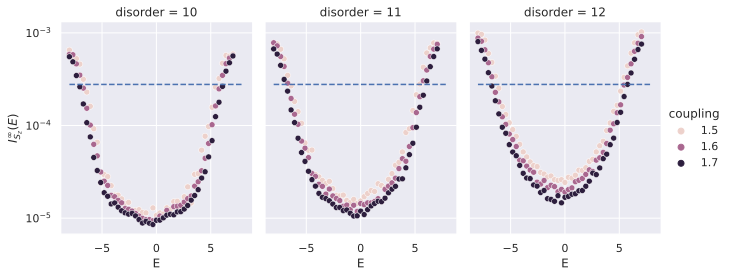

In [74]:
data = deloc_df
data = data.loc[~(data["binnum"].isin([-1, 0, 49]))]
plot = sns.relplot(data=data, x="energy", y=np.abs(data["spin_up_imb_S_z"]), hue="coupling",
                   col="disorder", col_wrap=3, height=4, aspect=0.8)
x = np.linspace(energy_core_min, energy_core_max, 100)
# y = 1e-5 * np.exp(8e-3*(x-25)**2)
for ax in plot.fig.axes:
    ax.set_yscale('log')
    # ax.plot(x, y)
    ax.plot(x, np.ones(x.shape)/length**2, linestyle="--")
    ax.set_xlabel("E")
    ax.set_ylabel(r"$I_{S_z}^{\infty}(E)$")

    
plotfilename = f"Imb_S_z_{pattern}_L{length}_PM_vs_energy_deloc_phase"
plot.savefig("plots/PNGs/" + plotfilename + ".png") 
plot.savefig("plots/PDFs/" + plotfilename + ".pdf") 

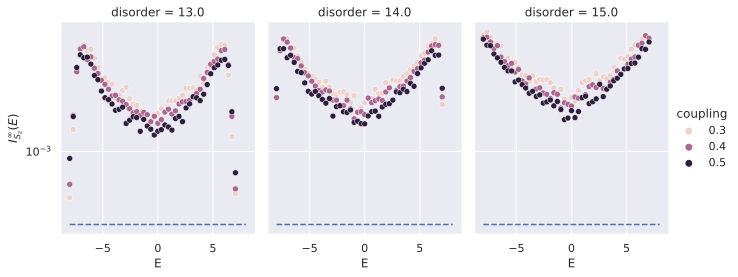

In [75]:
data = loc_df
data = data.loc[~(data["binnum"].isin([-1, 0, 49]))]

plot = sns.relplot(data=data, x="energy", y=np.abs(loc_df["spin_up_imb_n_up"]), hue="coupling",
                   col="disorder", col_wrap=3, height=4, aspect=0.8)
x = np.linspace(energy_core_min, energy_core_max, 100)
# y = 1e-3 * np.exp(3e-3*(x-25)**2)

for ax in plot.fig.axes:
    ax.set_yscale('log')
    # ax.plot(x, y)
    ax.plot(x, np.ones(x.shape)/length**2, linestyle="--")
    ax.set_xlabel("E")
    ax.set_ylabel(r"$I_{S_z}^{\infty}(E)$")

plotfilename = f"Imb_S_z_{pattern}_L{length}_PM_vs_energy_loc_phase"
plot.savefig("plots/PNGs/" + plotfilename + ".png") 
plot.savefig("plots/PDFs/" + plotfilename + ".pdf") 